# Communicating Data Insight on Ford GoBike(Part2/2)




## by Aluko Bamidele



## Investigation Overview


This project is focus on the importance of data visualization techniques in data analysis. This project is divided into two(2) part. 

The first part, i employ the use of python libraries to wrangle and explore the ford-go-bike trup data. The wrangled and clean file is now been used to plots graphs, chart with single variables up to multiple variables.

The second part of the project is focus on presenting the insigts that i discovered in the part 1 section of the project.





## Dataset Overview

The data set explored consist of trip data for individual made in a bike shaing system in San-Francisco Bay area.
The dataset consist  183412 bike trips each with duration and start and end location of each trip and other informations. I further created variable liks the days of the week, duration in hours in other to enhance out findings.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from importlib import reload
plt=reload(plt)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Load in clean data Set
df_trip = pd.read_csv('201902-fordgobike-tripdata_clean.csv')
df_trip.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,duration_min,duration_hrs,start_day,age,time,dates,hour,weekday_number,weekday_names
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,No,869.8,14.5,Thursday,35,2019-02-28 17:32:10.145,2019-02-28,17,3,Thursday
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,No,1030.9,17.2,Thursday,47,2019-02-28 12:13:13.218,2019-02-28,12,3,Thursday
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,No,608.2,10.1,Thursday,30,2019-02-28 17:54:26.010,2019-02-28,17,3,Thursday
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,Yes,26.4,0.4,Thursday,45,2019-02-28 23:54:18.549,2019-02-28,23,3,Thursday
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,...,No,29.9,0.5,Thursday,60,2019-02-28 23:49:58.632,2019-02-28,23,3,Thursday


In [3]:
# write a function that accepts all labels
def label(x, y, t):
    plt.xlabel(x ,fontsize=15, weight='bold')
    plt.ylabel(y, fontsize=15, weight='bold')
    plt.title(t,fontsize=18,weight='bold'), 
    #plt.legend(loc='upper right')
    plt.show()

Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.


## Day and Time Service Usage

From the chat above, shows the daily distribution of service usage. The Usage of this services is**high on the weekday** and **less on the weekends.** with Thursday as the peck usage day.

The usage is also high during the peak hours of the day.

 

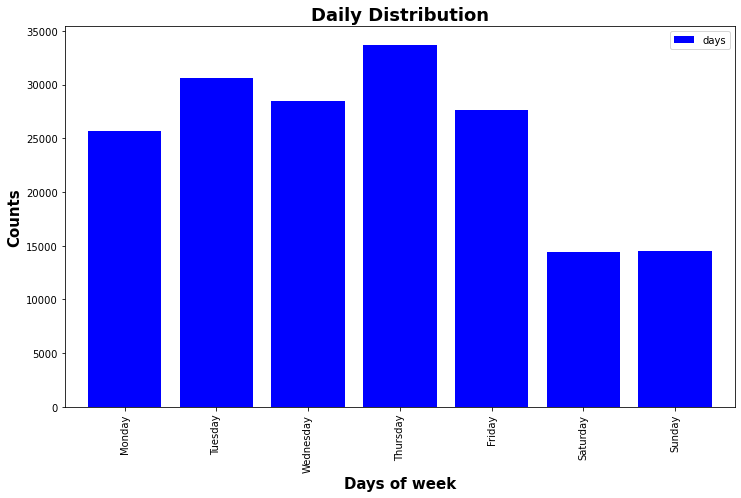

In [6]:
df_trip['weekday_number'] = pd.DatetimeIndex(df_trip['dates']).weekday
df_trip['weekday_names'] = pd.DatetimeIndex(df_trip['dates']).day_name()

#days= {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#df['start_day'] =df['start_day'].apply(lambda x: days[x])

df_combine = (df_trip.groupby(['weekday_number', 'weekday_names']).size().reset_index(name="days"))
df_combine

df_combine.plot.bar(x="weekday_names", y="days", color='blue', figsize= (12,7), width = 0.8, title='Daily');
label('Days of week', 'Counts','Daily Distribution')

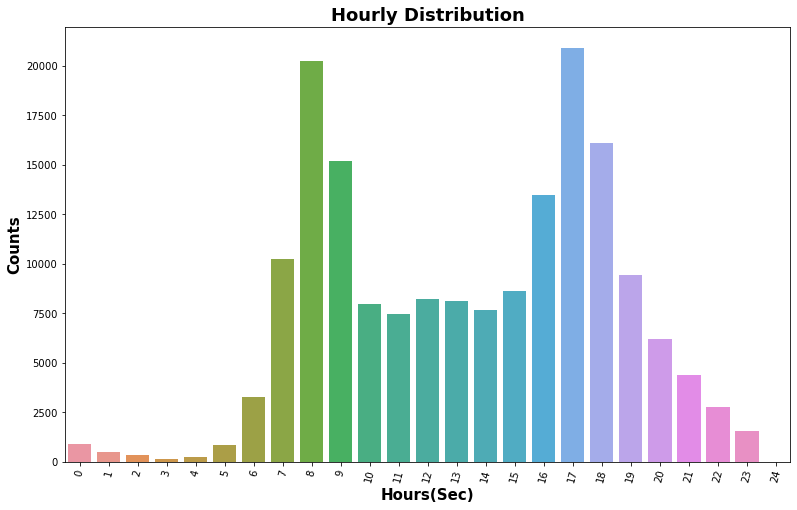

In [5]:
plt.figure(figsize=(13,8))
hour_dist = df_trip['hour'].value_counts().index
orders = np.arange(0,25)
sns.countplot(data=df_trip, x='hour', order=orders)
plt.xticks(rotation=75)
label('Hours(Sec)', 'Counts','Hourly Distribution')

## User Type Comprison

From the total entry of 175147 row in 2019 data, **15856(90.5 percent) of users are Subscribers** while the remaining **16631(9.5%) are customers**. We can see a ratio of 1 to 10 between the customers and subscribers.

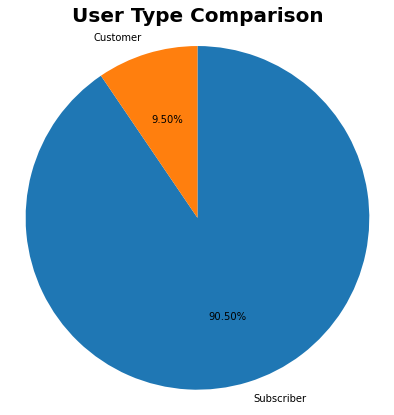

In [7]:
# Show user type by it's percentage
plt.figure(figsize=(12,7))
sorted_counts = df_trip['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('User Type Comparison', fontsize=20, weight='bold');

## Stations Usage

 **Market st at 10th st** and **San Francisco Caltron Station 2** are on top of the chart. The **Market st at 10th st** has over **3500** trip initiating from the station while **San Francisco Caltron Station 2** has a little **less than 3500** rides initiating from the station.There is an alternating in positions between the two station. **Market st at 10th st** is on top of the list in the most used start stations and came second in the most used end station. We can agree that **San Francisco Caltron Station 2**  which has over bikes ending their trip at that station show or might indicate that such station is located at one of the busiest area of the town.


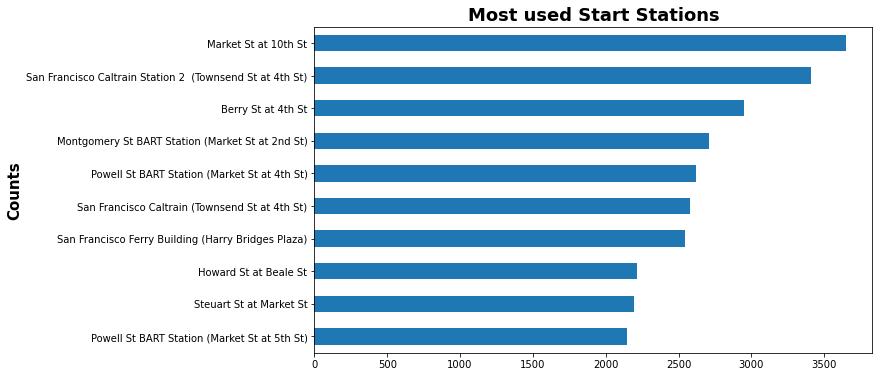

In [8]:
# Move somewhere down
stations=df_trip.start_station_name .value_counts(ascending=True)
stations.tail(10).plot(kind='barh', figsize= (10,6))
label("","Counts",'Most used Start Stations')


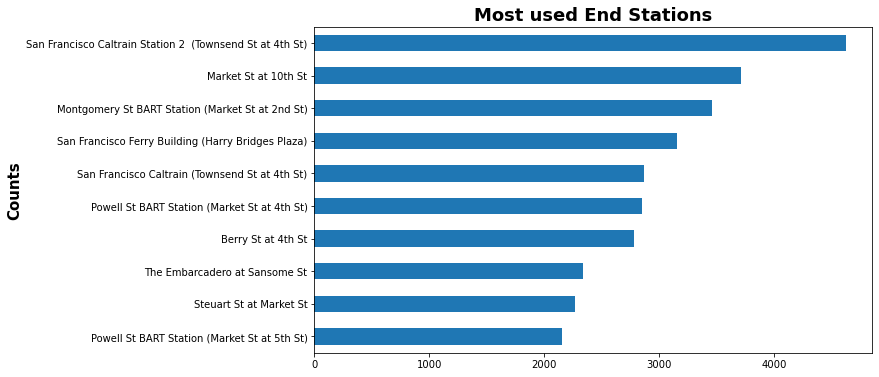

In [9]:
stations=df_trip.end_station_name .value_counts(ascending=True)
stations.tail(10).plot(kind='barh', figsize= (10,6))
label("","Counts",'Most used End Stations')


## Relationship Between Age and Duration 

There is a positive correlation between these two variable. we notice that there is a decline in duration of trip from a little above 45 age.
 - Longer duration is covered by riders of younger ages.
 - The age with maximun distance is between age 25 to 30
 - Age is a major factor to distance traveled

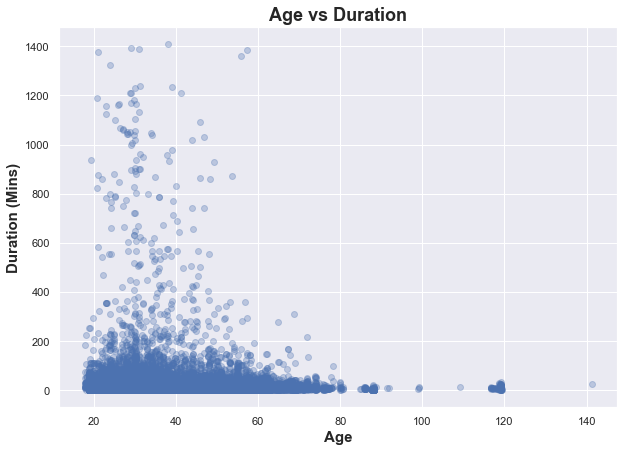

In [10]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.regplot(data=df_trip, x='age', y='duration_min', x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
label('Age', 'Duration (Mins)', 'Age vs Duration')



## Relationship Between User Type vs Service Usage by  hour and Day

- The usage of the services  by suscribers are high compare to that of the customers. The use of the services by the subscribers are high during the peak hours. THough that of the customers seems to maintian almost same level, there is also a slight increase during the peak hours also.

- **This can be said that being a suscriber to the services has great influene in the usage of the services.**

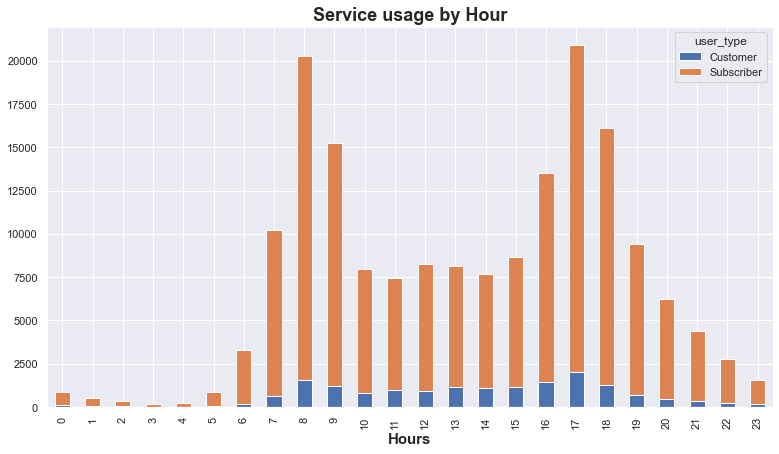

In [11]:

df_plot = df_trip.groupby(['user_type', 'hour']).size().reset_index().pivot(columns='user_type', index='hour', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(13,7), )
plt.title('Service usage by hour', fontsize=18)
label('Hours', '', 'Service usage by Hour')


## Relationship Between User Type vs Service Usage by  hour and Day

The box plot above show that despite not using the bike sharing system for all trip, the duration covered is high compare to those using it for all trip.

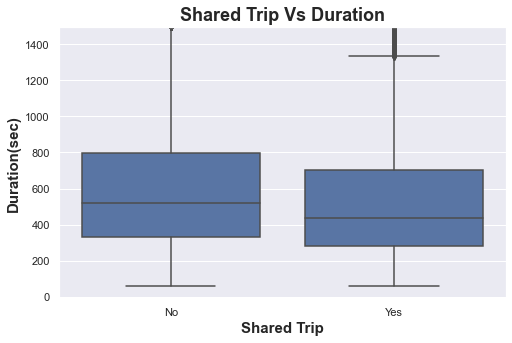

In [12]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data = df_trip, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1500])
label('Shared Trip', 'Duration(sec)', 'Shared Trip Vs Duration')


## Relationship Between Gender and Duration

 - The volume of male riders are high compare to the female riders. Comparing the gender variable with the duration covered, , it show that female riders engage in longer trips that the males.
 - It is also seen that most persons whose gender are not recorded as either male or female also covered longer distance. This shows the inaccuracy of the data.

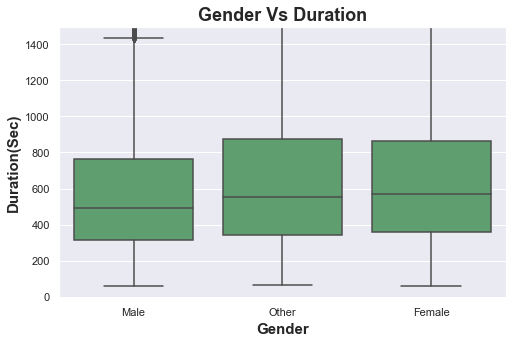

In [13]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[2]
sns.boxplot(data = df_trip, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1500])
label('Gender', 'Duration(Sec)', 'Gender Vs Duration')


## Relationship Between Gender, Age and Duration

The two plot shows a similar trend. But is it observe that the male gender shows a slight volumn of male users that went above 40000 seconds of trip compare to the female chart. Comparing the volumn of male to female participant, it can be said that Gender does not have much effect on the usage  duration rather age does.
 
 

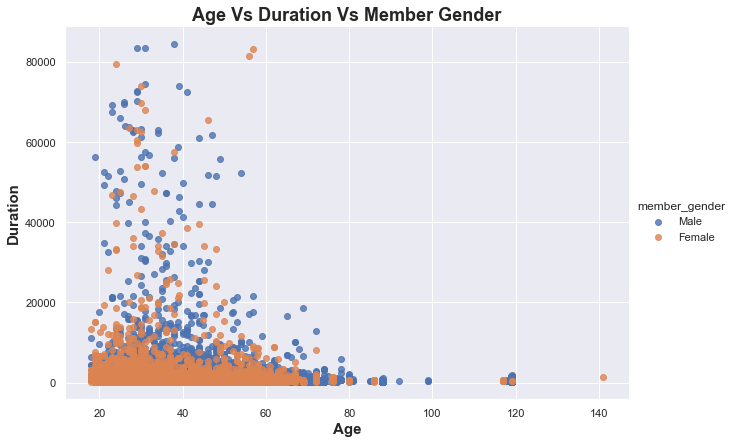

In [14]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['Male', 'Female'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Member Gender')

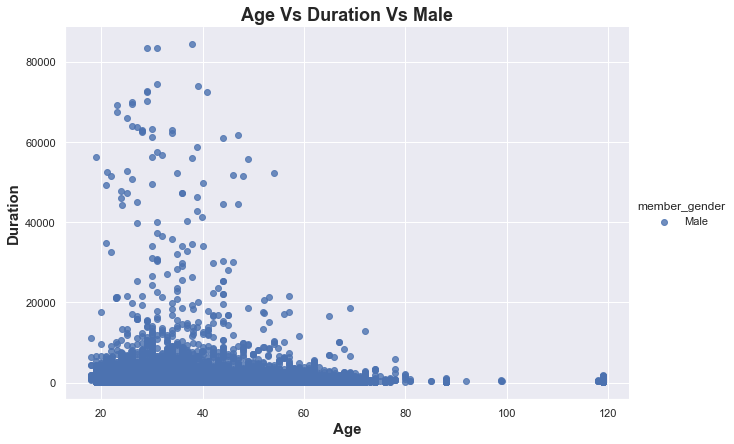

In [15]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['Male', ''], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Male')


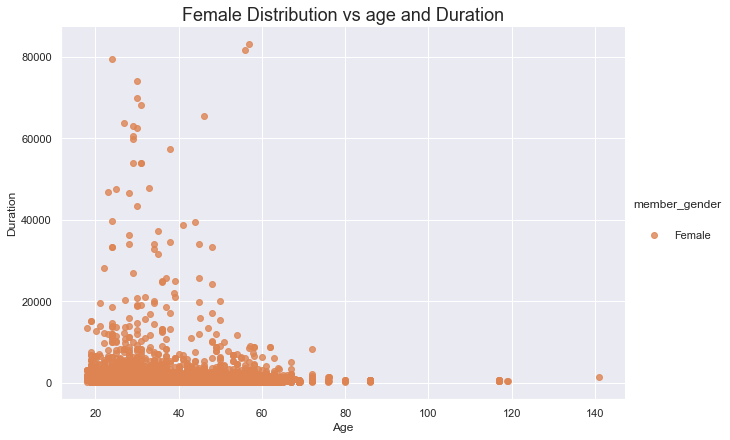

In [14]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['', 'Female'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.title('Female Distribution vs age and Duration', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Duration');

## Key Insight
- Age has a significant effect on the distance covered
- Those who do not use the bike share system for all trip still spend more time using the system. 
- There are more active activities during weekdays than on weekends
- Subscribers are actively using the services that the customers

In [16]:
!pip install jupyter_contrib_nbextensions

In [21]:
!jupyter nbconvert Ford_Go projectPart_II_slide_deck.ipynb --to slides



This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Ford_Go' matched no files
[NbConvertApp] WARNING | pattern 'projectPart_II_slide_deck.ipynb' matched no files


In [ ]:

!jupyter nbconvert Ford_Go_projectPart_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 